# Project 2 Djikstra's Algorithm


In [1]:
import numpy as np
import pandas as pd
import random
import time
import networkx as nx
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
def generate(n, w, p):
    ret = nx.fast_gnp_random_graph(n, p, seed=777)
    for (u, v) in ret.edges():
        ret.edges[u,v]['weight'] = random.randint(1, w)
    return ret

In [3]:
def plot_graph(G):
    pos = nx.spring_layout(G, seed=555)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=12, edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights, font_color='red')
    plt.title("Generated Graph with Weights")
    plt.show()

In [4]:
def to_adj_matrix(G):
    return nx.to_numpy_array(G, dtype=int)

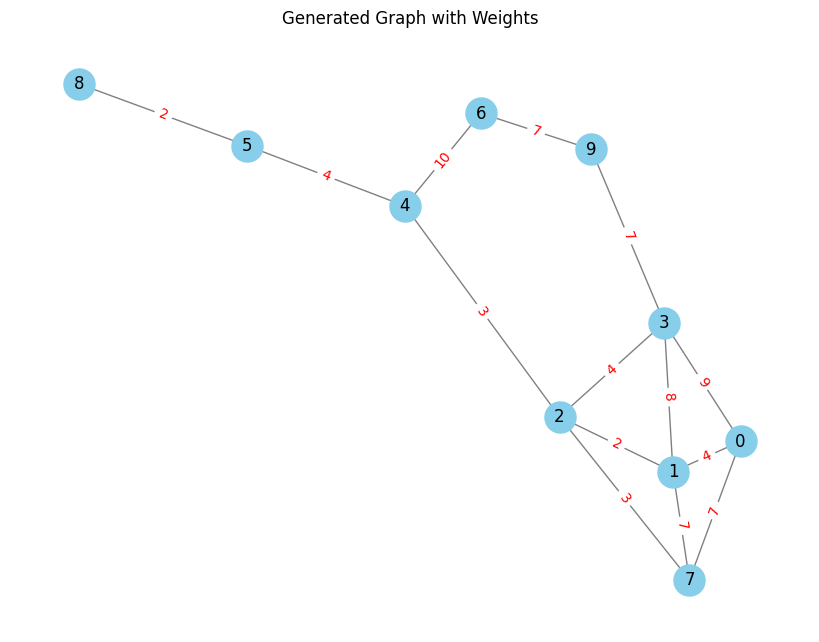

In [5]:
graph = generate(10, 10, 0.4)
plot_graph(graph)

## A. Adj Matrix and Array
Suppose the input graph G = (V, E) is stored in an adjacency matrix and we
use an array for the priority queue. 

Implement the Dijkstra’s algorithm using this
setting and analyze its time complexity with respect to |V| and |E| both
theoretically and empirically.

In [6]:
# Djikstra for part 1a
# Assume it is stored in an adj matrix, assuming V nodes, size of adj matrix is V x V

def dijkstra_1a(adj_matrix, source):
    # measures distance from that 
    V = len(adj_matrix)
    distances = [float('inf') for i in range(V)] 
    
    # distance from root to itself is 0
    distances[source] = 0
    visited = set()
    while len(visited) != V:
        # first we extract cheapest node
        min_node = -1
        distance = float('inf')
        for i in range(V):
            if i not in visited and distances[i] < distance:
                min_node = i
                distance = distances[i]
        
        if min_node == -1:
            return distances
        
        visited.add(min_node)
        for i in range(V):
            if adj_matrix[min_node][i] != 0 and i not in visited:
                distances[i] = min(distances[i], distances[min_node] + adj_matrix[min_node][i])
    return distances

In [7]:
dijkstra_1a(to_adj_matrix(graph), 0)

[0,
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(9),
 np.int64(13),
 np.int64(19),
 np.int64(7),
 np.int64(15),
 np.int64(16)]

In [8]:
# theoretical time complexity is clearly O(V^2) as each time we extract the cheapest node, we add the node to visited and check the rest of the nodes
# and we need to do this V times
# and each time, we look through the array of distances of size V
# empirical time complexity is as follows
sizes = [10 ** i for i in range(1, 5)]
runtimes = []

for size in sizes:
    g = generate(size, 1000, 0.3)
    source = 0
    start_time = time.perf_counter()
    dijkstra_1a(to_adj_matrix(g), source)
    end_time = time.perf_counter()
    runtimes.append(end_time - start_time)

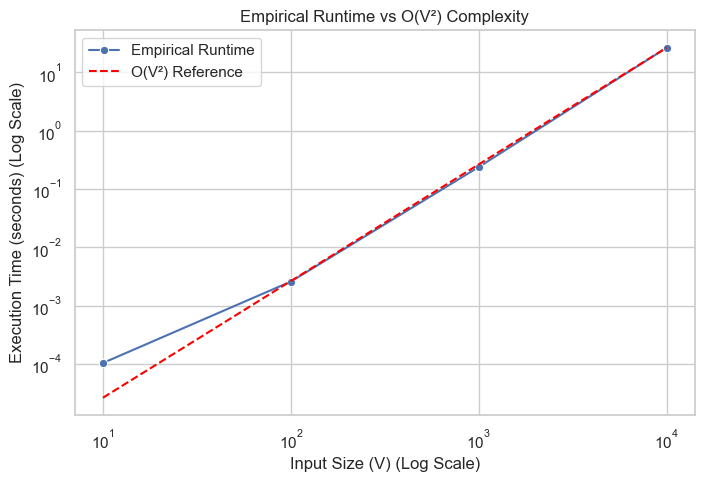

In [9]:
# Convert to Pandas DataFrame
df = pd.DataFrame({'Input Size': sizes, 'Runtime (seconds)': runtimes})

# Plot empirical data
sb.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sb.lineplot(x='Input Size', y='Runtime (seconds)', marker='o', data=df, label="Empirical Runtime")

# Overlay a theoretical O(V^2) curve
V_squared = np.array(sizes) ** 2
scaling_factor = runtimes[-1] / V_squared[-1]  # Normalize to match empirical data
plt.plot(sizes, scaling_factor * V_squared, linestyle="--", color="red", label="O(V²) Reference")

# Log scale for better visualization (optional)
plt.xscale("log")
plt.yscale("log")  # Log-log scale highlights polynomial growth

# Labels and title
plt.xlabel("Input Size (V) (Log Scale)")
plt.ylabel("Execution Time (seconds) (Log Scale)")
plt.title("Empirical Runtime vs O(V²) Complexity")
plt.legend()

# Show plot
plt.show()

## B. Adj List and Heap

In [10]:
def adj_matrix_to_list(adj_matrix):
    adj_list = {}
    V = len(adj_matrix)  # Number of vertices

    for i in range(V):
        adj_list[i] = []
        for j in range(V):
            if adj_matrix[i][j] != 0:  # Non-zero means there is an edge
                adj_list[i].append((j, adj_matrix[i][j]))  # (neighbor, weight)
    
    return adj_list

In [11]:
import heapq

def dijkstra_1b(adj_list, source):
    pq = []
    heapq.heapify(pq)
    heapq.heappush(pq, (0, source))
    distances = [float('inf') for i in range(len(adj_list))]
    distances[source] = 0
    while len(pq) != 0:
        # get 
        distance, node = heapq.heappop(pq)
        for neighbour, weight in adj_list[node]:
            if distances[neighbour] > distance + weight:
                distances[neighbour] = distance + weight
                heapq.heappush(pq, (distances[neighbour], neighbour))
    return distances

In [12]:
dijkstra_1b(adj_matrix_to_list(to_adj_matrix(graph)), 0)

[0,
 np.int64(4),
 np.int64(6),
 np.int64(9),
 np.int64(9),
 np.int64(13),
 np.int64(19),
 np.int64(7),
 np.int64(15),
 np.int64(16)]

In [13]:
# Theoretical time complexity is O((V+E)logV). Every heap operation is O(logV), so applying it for every vertice V and its associated edges E
# resulting in a total of O((V+E)logV))
# empirical time complexity is as follows
sizes = [10 ** i for i in range(1, 5)]
runtimes = []
edges = np.empty(4)
i = 0
for size in sizes:
    g = generate(size, 1000, 0.3)
    edge = g.number_of_edges()
    edges[i] = edge
    source = 0
    start_time = time.perf_counter()
    dijkstra_1b(adj_matrix_to_list(to_adj_matrix(g)), source)
    end_time = time.perf_counter()
    runtimes.append(end_time - start_time)
    i += 1

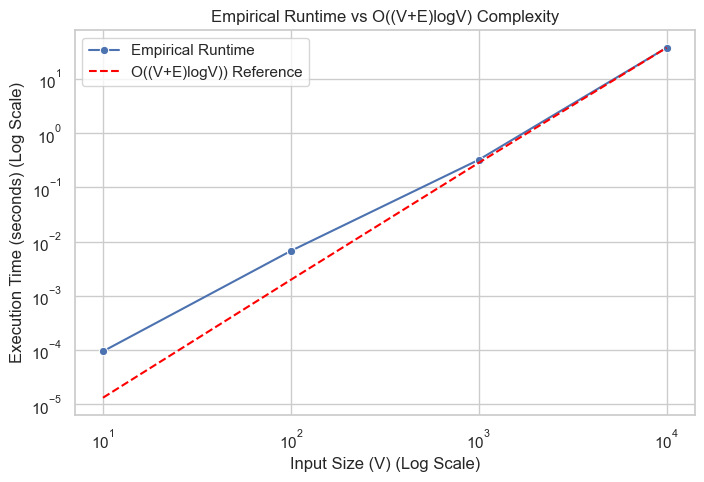

In [14]:
# Convert to Pandas DataFrame
df = pd.DataFrame({'Input Size': sizes, 'Runtime (seconds)': runtimes})

# Plot empirical data
sb.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sb.lineplot(x='Input Size', y='Runtime (seconds)', marker='o', data=df, label="Empirical Runtime")

# Overlay a theoretical O((V+E)logV)) curve
VE_logV = (np.array(sizes) + edges) * np.log(np.array(sizes))
scaling_factor = runtimes[-1] / VE_logV[-1]  # Normalize to match empirical data
plt.plot(sizes, scaling_factor * VE_logV, linestyle="--", color="red", label="O((V+E)logV)) Reference")

# Log scale for better visualization (optional)
plt.xscale("log")
plt.yscale("log")  # Log-log scale highlights polynomial growth

# Labels and title
plt.xlabel("Input Size (V) (Log Scale)")
plt.ylabel("Execution Time (seconds) (Log Scale)")
plt.title("Empirical Runtime vs O((V+E)logV) Complexity")
plt.legend()

# Show plot
plt.show()

## C. Analysis

In [15]:
def generate_nm(n, m, w):
    ret = nx.gnm_random_graph(n, m, seed=777)
    for (u, v) in ret.edges():
        ret.edges[u,v]['weight'] = random.randint(1, w)
    return ret

### Compared by |V|

In [16]:
V = [1000, 2000, 5000, 7000, 10000]
E = 10000
runtimes_a = []
runtimes_b = []
source = 0

for v in V:
    g = generate_nm(v, E, 100)
    
    start_time = time.perf_counter()
    dijkstra_1a(to_adj_matrix(g), source)
    end_time = time.perf_counter()
    runtimes_a.append(end_time - start_time)
    
    start_time = time.perf_counter()
    dijkstra_1b(adj_matrix_to_list(to_adj_matrix(g)), source)
    end_time = time.perf_counter()
    runtimes_b.append(end_time - start_time)
    
    print(g, runtimes_a[-1], runtimes_b[-1])

Graph with 1000 nodes and 10000 edges 0.2162016669753939 0.12608299986459315
Graph with 2000 nodes and 10000 edges 0.8680212500039488 0.475390916923061
Graph with 5000 nodes and 10000 edges 7.593693292001262 2.9432165829930454
Graph with 7000 nodes and 10000 edges 16.967378332978114 5.766635333187878
Graph with 10000 nodes and 10000 edges 36.89793879096396 11.863777625141665


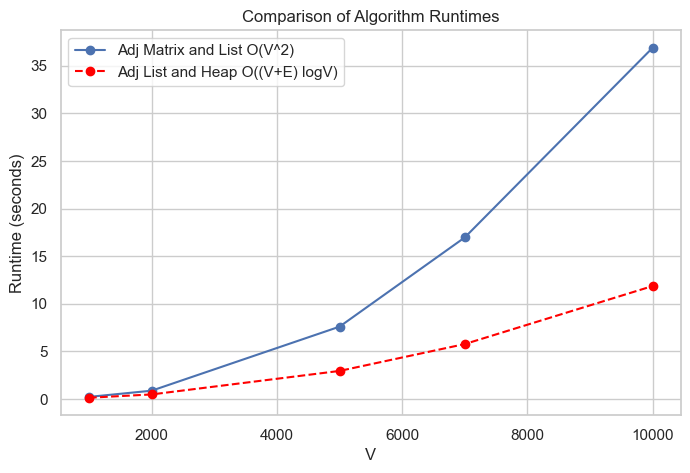

In [17]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(V, runtimes_a, marker='o', linestyle='-', label='Adj Matrix and List O(V^2)')
plt.plot(V, runtimes_b, marker='o', linestyle='--', color='red', label='Adj List and Heap O((V+E) logV)')

# Labels and title
plt.xlabel('V')
plt.ylabel('Runtime (seconds)')
plt.title('Comparison of Algorithm Runtimes')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### Compared by |E|

In [18]:
V = 1000
E = [2000, 5000, 10000, 20000, 50000, 100000]
runtimes_a = []
runtimes_b = []
source = 0

for e in E:
    g = generate_nm(V, e, 100)
    
    start_time = time.perf_counter()
    dijkstra_1a(to_adj_matrix(g), source)
    end_time = time.perf_counter()
    runtimes_a.append(end_time - start_time)
    
    start_time = time.perf_counter()
    dijkstra_1b(adj_matrix_to_list(to_adj_matrix(g)), source)
    end_time = time.perf_counter()
    runtimes_b.append(end_time - start_time)
    
    print(g, runtimes_a[-1], runtimes_b[-1])

Graph with 1000 nodes and 2000 edges 0.33515208400785923 0.11940600001253188
Graph with 1000 nodes and 5000 edges 0.2080237918999046 0.11947658308781683
Graph with 1000 nodes and 10000 edges 0.18171954178251326 0.12839870899915695
Graph with 1000 nodes and 20000 edges 0.17311004200018942 0.13731287489645183
Graph with 1000 nodes and 50000 edges 0.17974283290095627 0.16803462500683963
Graph with 1000 nodes and 100000 edges 0.2045394170563668 0.2175208330154419


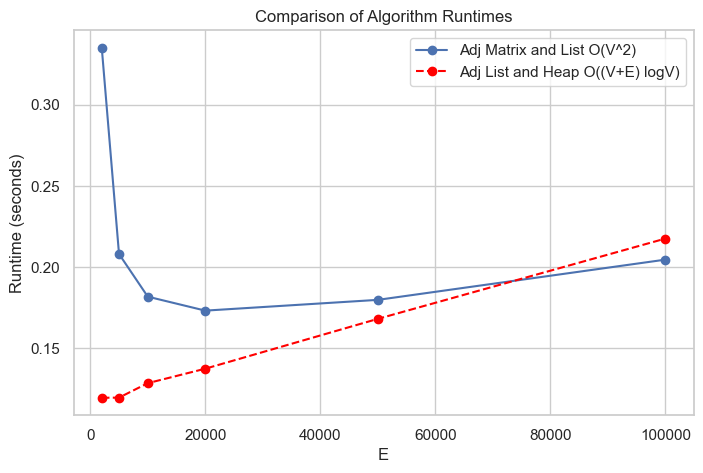

In [19]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(E, runtimes_a, marker='o', linestyle='-', label='Adj Matrix and List O(V^2)')
plt.plot(E, runtimes_b, marker='o', linestyle='--', color='red', label='Adj List and Heap O((V+E) logV)')

# Labels and title
plt.xlabel('E')
plt.ylabel('Runtime (seconds)')
plt.title('Comparison of Algorithm Runtimes')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()